# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [171]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [172]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [173]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [174]:
print(iris.keys())      #有什麼資料庫
print(iris['filename']) #檔案位置 找路徑
print(iris.data[0:10])  #印出前10筆
print(type(iris.data))  #<class 'numpy.ndarray'>
print(iris.target_names)# ['setosa' 'versicolor' 'virginica']
print(iris.target)



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [175]:
iris.feature_names[0:2]

['sepal length (cm)', 'sepal width (cm)']

In [176]:
# we only take the first two features. 
X = iris.data[:,:2] #取前2欄資料
#print(X)
print(X.shape) #(150, 2) 150列 2欄   2維<class 'numpy.ndarray'>
Y = iris.target
print(Y.shape) #(150,) 1維 <class 'numpy.ndarray'>

(150, 2)
(150,)


In [177]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [178]:
print("target_names:"+str(iris['target_names']))


target_names:['setosa' 'versicolor' 'virginica']


In [179]:
#建立Target欄位與資料
y =pd.DataFrame(iris['target'],columns = ['target']) #columns = ['target'] target 是自己輸入
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [180]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)

#只許想要的欄位
#iris_data = iris_data[['sepal length (cm)','sepal width (cm)']]

iris_data.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [181]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])] #target欄位是0和1

iris_data #剩100筆
#print(iris['data'].size/len(iris['feature_names']))




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


## 切分訓練集與測試集
><fd> train_test_split()

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data[['target']],test_size=0.7)

In [183]:
X_train.head()
#X_train.shape test_size=0.2 >(80, 2)


,sepal length (cm),petal length (cm)
75,6.6,4.4
81,5.5,3.7
63,6.1,4.7
86,6.7,4.7
37,4.9,1.4


In [184]:
X_test.head()
#X_test.shape  test_size=0.2 >(20, 2)

,sepal length (cm),petal length (cm)
56,6.3,4.7
59,5.2,3.9
80,5.5,3.8
50,7.0,4.7
7,5.0,1.5


In [185]:
Y_train.head()
#Y_train.shape

,target
75,1
81,1
63,1
86,1
37,0


In [186]:
Y_test.head()

,target
56,1
59,1
80,1
50,1
7,0


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [187]:
from IPython.display import Math

Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [188]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [189]:
def norm_stats(dfs): #dfs DataFrame的格式
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [190]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train

arr_y_train = np.array(Y_train)
arr_x_train[:5]

C:\Users\PRO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\PRO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\PRO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[ 1.41710952,  0.87568845],
       [-0.23535034,  0.37048358],
       [ 0.6659914 ,  1.09220483],
       [ 1.56733314,  1.09220483],
       [-1.13669209, -1.2894753 ]])

In [191]:
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
arr_x_test[:5]


C:\Users\PRO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\PRO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\PRO\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[ 1.49095446,  1.37058529],
       [-0.31413191,  0.81641362],
       [ 0.17816437,  0.74714216],
       [ 2.63964579,  1.37058529],
       [-0.64232944, -0.84610139]])

## use sklearn

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.65666667 3.18666667]
[0.66567426 1.38557649]


In [193]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[ 1.41710952,  0.87568845],
       [-0.23535034,  0.37048358],
       [ 0.6659914 ,  1.09220483],
       [ 1.56733314,  1.09220483],
       [-1.13669209, -1.2894753 ]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [194]:
sc = StandardScaler().fit(X_test)
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 1.49095446  1.37058529]
 [-0.31413191  0.81641362]
 [ 0.17816437  0.74714216]
 [ 2.63964579  1.37058529]
 [-0.64232944 -0.84610139]
 [-0.47823068 -0.77682993]
 [-0.31413191 -0.84610139]
 [ 0.01406561  1.23204237]
 [-0.97052696 -0.77682993]
 [-0.47823068 -0.70755847]]


you can also use fit_transform method (i.e., fit and then transform)    

In [195]:
X_train_std = sc.fit_transform(X_train)  #?
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 1.49095446  1.37058529]
 [-0.31413191  0.81641362]
 [ 0.17816437  0.74714216]
 [ 2.63964579  1.37058529]
 [-0.64232944 -0.84610139]
 [-0.47823068 -0.77682993]
 [-0.31413191 -0.84610139]
 [ 0.01406561  1.23204237]
 [-0.97052696 -0.77682993]
 [-0.47823068 -0.70755847]]


In [196]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.215061275114046
30.663483382762305


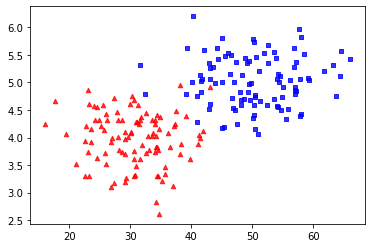

In [197]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [198]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [199]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [200]:
minmax_norm(x_val[:10])

array([0.70692163, 0.9038231 , 0.75907909, 0.        , 0.56678195,
       1.        , 0.54590077, 0.41448862, 0.69173127, 0.68448406])

In [201]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val = x_val.reshape(-1,1) #1D轉2D
print(y_val.shape)
scaler = MinMaxScaler().fit(x_val)
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

(200,)
(200,)
[65.97742573]
[16.10834074]
[[0.62870152]
 [0.71762061]
 [0.6522554 ]
 [0.30946153]
 [0.5654156 ]
 [0.7610533 ]
 [0.55598583]
 [0.49664118]
 [0.62184168]
 [0.6185689 ]]
